In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./nats/30_data_notifications.csv')
print(df.head())
print(len(df))

                        _id      createdAt  receivedByConsumerAt  \
0  66aaf868fbaaf32201d46f6c  1722480744618         1722480744614   
1  66aaf868fbaaf32201d46f6d  1722480744832         1722480744828   
2  66aaf868fbaaf32201d46f6e  1722480744845         1722480744841   
3  66aaf868fbaaf32201d46f6f  1722480744856         1722480744853   
4  66aaf868fbaaf32201d46f70  1722480744873         1722480744869   

   sentFromBrokerAt  updatedAt  
0     1722480744030          0  
1     1722480744029          0  
2     1722480744037          0  
3     1722480744039          0  
4     1722480744040          0  
28780


In [3]:
# Convert columns to integer type if needed
df['receivedByConsumerAt'] = pd.to_numeric(df['receivedByConsumerAt'], errors='coerce')
df['sentFromBrokerAt'] = pd.to_numeric(df['sentFromBrokerAt'], errors='coerce')

In [4]:
df['e2eLatency'] = df['receivedByConsumerAt'] - df['sentFromBrokerAt']

In [5]:
print(df.head())

                        _id      createdAt  receivedByConsumerAt  \
0  66aaf868fbaaf32201d46f6c  1722480744618         1722480744614   
1  66aaf868fbaaf32201d46f6d  1722480744832         1722480744828   
2  66aaf868fbaaf32201d46f6e  1722480744845         1722480744841   
3  66aaf868fbaaf32201d46f6f  1722480744856         1722480744853   
4  66aaf868fbaaf32201d46f70  1722480744873         1722480744869   

   sentFromBrokerAt  updatedAt  e2eLatency  
0     1722480744030          0         584  
1     1722480744029          0         799  
2     1722480744037          0         804  
3     1722480744039          0         814  
4     1722480744040          0         829  


In [6]:
df.to_csv('data_30_nats_with_latency.csv', index=False)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_sorted = df.sort_values(by='e2eLatency').reset_index(drop=True)

percentiles = df_sorted['e2eLatency'].quantile([0.50, 0.70, 0.90, 0.95, 0.99])
print(percentiles)

0.50    30035.50
0.70    41596.20
0.90    54124.30
0.95    56816.05
0.99    58966.00
Name: e2eLatency, dtype: float64


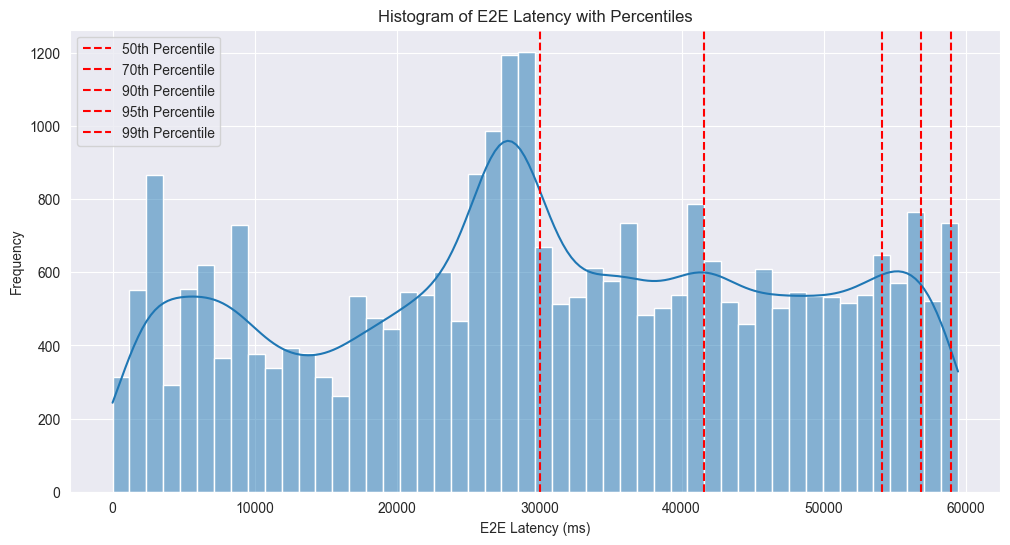

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['e2eLatency'], bins=50, kde=True)

# Tambahkan garis vertikal untuk persentil
for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
    plt.axvline(percentiles[p], color='r', linestyle='--', label=f'{int(p*100)}th Percentile')

plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())

plt.title('Histogram of E2E Latency with Percentiles')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

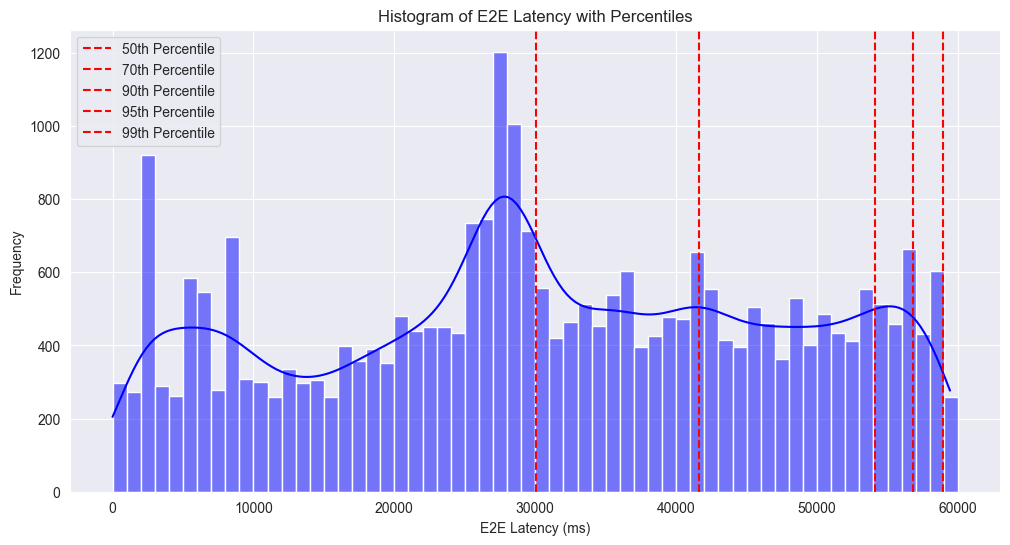

In [11]:
# Tentukan rentang bin
min_latency = df_sorted['e2eLatency'].min()
max_latency = df_sorted['e2eLatency'].max()
bin_range = range(int(min_latency), int(max_latency) + 1000, 1000)

# Visualisasikan histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['e2eLatency'], bins=bin_range, kde=True, color='blue')

# Tambahkan garis vertikal untuk persentil
for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
    plt.axvline(percentiles[p], color='r', linestyle='--', label=f'{int(p*100)}th Percentile')

plt.title('Histogram of E2E Latency with Percentiles')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
start_time_ms = 1722480741967
end_time_ms = 1722480971106
data_received_mongo = 28780   
#data_received_postgres = 28780    
#data_loss_nats = 0

# Hitung total waktu pengujian dalam milidetik
total_time_ms = end_time_ms - start_time_ms

# Konversi total waktu ke detik
total_time_seconds = total_time_ms / 1000

# Hitung throughput
throughput = data_received_mongo / total_time_seconds


# Konversi total waktu ke jam
total_time_hours = total_time_seconds / 3600

# Konversi total waktu ke menit
total_time_minutes = total_time_seconds / 60

# Tampilkan hasil
print(f"Total waktu pengujian milish : {total_time_ms: .3f}")
print(f"Total waktu pengujian: {total_time_seconds:.3f} detik ({total_time_hours:.3f} jam) ({total_time_minutes:.3f} menit)")
print(f"Total event yang diproses: {data_received_mongo}")
print(f"Throughput: {throughput:.2f} events/second")

Total waktu pengujian milish :  229139.000
Total waktu pengujian: 229.139 detik (0.064 jam) (3.819 menit)
Total event yang diproses: 28780
Throughput: 125.60 events/second


In [5]:
# using actual data from csv

start_time_ms = df['sentFromBrokerAt'].min()
end_time_ms = df['receivedByConsumerAt'].max()
data_received_mongo = len(df)
#data_received_postgres = 5757095 
#data_loss = 0

# Hitung total waktu pengujian dalam milidetik
total_time_ms = end_time_ms - start_time_ms

# Konversi total waktu ke detik
total_time_seconds = total_time_ms / 1000

# Hitung throughput
throughput = data_received_mongo / total_time_seconds


# Konversi total waktu ke jam
total_time_hours = total_time_seconds / 3600

# Konversi total waktu ke menit
total_time_minutes = total_time_seconds / 60

# Tampilkan hasil
print(f"Total waktu pengujian milish : {total_time_ms: .3f}")
print(f"Total waktu pengujian: {total_time_seconds:.3f} detik ({total_time_hours:.3f} jam) ({total_time_minutes:.3f} menit)")
print(f"Total event yang diproses: {data_received_mongo}")
print(f"Throughput: {throughput:.2f} events/second")

Total waktu pengujian milish :  246436.000
Total waktu pengujian: 246.436 detik (0.068 jam) (4.107 menit)
Total event yang diproses: 28780
Throughput: 116.78 events/second
